# Auswertung

In [6]:
#Importieren von allen benötigten Modulen

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import io
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = 16, 9

# Diagramm mit Fit und integriertem chi² 

def PLOT(U_Ein,fehler_U_Ein,U_A,fehler_U_A):
    #Fitfunktion
    from scipy import odr

    def fit_func(p, x):
        (v) = p
        return -v*x

    model = odr.Model(fit_func)

    #darzustellende Daten
    x = U_Ein
    y = U_A
    delta_x = fehler_U_Ein
    delta_y = fehler_U_A

    #Startparameter
    para0 = [1.0]

    data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
    odr = odr.ODR(data, model, beta0=para0 )
    out = odr.run()

    #1-Sigma
    popt = out.beta
    perr = out.sd_beta
    
    #Sigma-Umgebung
    nstd = 8 # um n-Sigma-Umgebung zu zeichnen
    popt_top = popt+nstd*perr
    popt_bot = popt-nstd*perr

    #Plot-Umgebung
    x_fit = np.linspace(min(x)*1.1, max(x)*1.1)
    fit = fit_func(popt, x_fit)
    fit_top = fit_func(popt_top, x_fit)
    fit_bot = fit_func(popt_bot, x_fit)

    #Plot
    fig, ax = plt.subplots(1)
    plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', 
                 fmt='o', capsize=3, label='Messdaten')
    plt.title('Diagramm 1: Spannungsverlauf ')
    plt.grid(True)
    plt.xlabel('Eingangsspannung '+r'${U_{Ein}}$'+' '+r'${[V]}$')
    plt.ylabel('Ausgangspannung '+r'${U_{A}}$' + ' '+r'${[V]}$')
    plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
    plt.legend(loc='best')
    plt.show()

    #Chi-Quadrat orthogonal
    from scipy.stats import chi2

    dof = x.size-popt.size
    chisquare = np.sum(((fit_func(popt, x)-y)**2)/
                       (delta_y**2+((fit_func(popt, x+delta_x)-
                                     fit_func(popt, x-delta_x))/2)**2))
    chisquare_red = chisquare/dof
    prob = round(1-chi2.cdf(chisquare,dof),2)*100


    print('V =', popt[0], ', Standardfehler =', perr[0])
    print('\n')
    print('Chi-Quadrat =', chisquare)
    print('Freiheitsgrade =', dof)
    print('Chi-Quadrat reduziert =', chisquare_red)
    print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

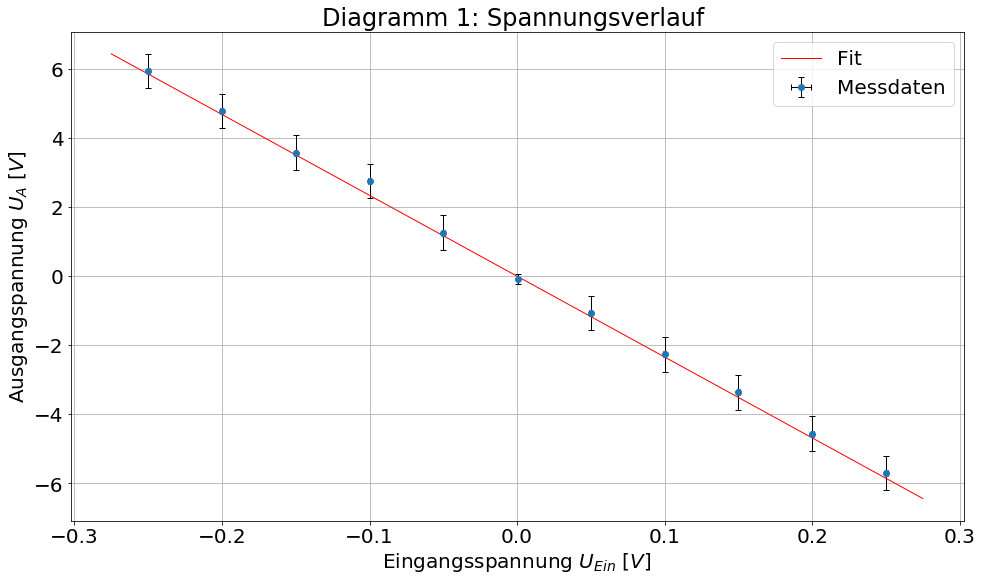

V = 23.414218657815653 , Standardfehler = 0.34581868838133795


Chi-Quadrat = 1.312631077972464
Freiheitsgrade = 10
Chi-Quadrat reduziert = 0.1312631077972464
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 100.0 %


In [7]:
# Messwerte aus Tabelle 1a) 

U_Ein = np.array([-250,-200,-150,-100,-50,0.5,50,100,150,200,250])*1e-3
fehler_U_Ein = np.array([1,1,1,1,1,0.3,1,1,1,1,1])*1e-3

U_A = np.array([59.4, 47.9, 35.8, 27.5, 12.6,-0.8,-10.7,-22.6,-33.6,-45.6,-57.0])*0.1
fehler_U_A =  np.array([0.5,0.5,0.5,0.5,0.5,0.15,0.5,0.5,0.5,0.5,0.5])

PLOT(U_Ein,fehler_U_Ein,U_A,fehler_U_A)


#Messwerte aus Tabelle 1: U_Ein über U_G

U_Ein = np.array([-250,-200,-150,-100,-50,0.5,50,100,150,200,250])*1e-3
fehler_U_Ein = np.array([1,1,1,1,1,0.3,1,1,1,1,1])*1e-3

U_A = np.array([59.4, 47.9, 35.8, 27.5, 12.6,-0.8,-10.7,-22.6,-33.6,-45.6,-57.0])*0.1
fehler_U_A =  np.array([0.5,0.5,0.5,0.5,0.5,0.15,0.5,0.5,0.5,0.5,0.5])

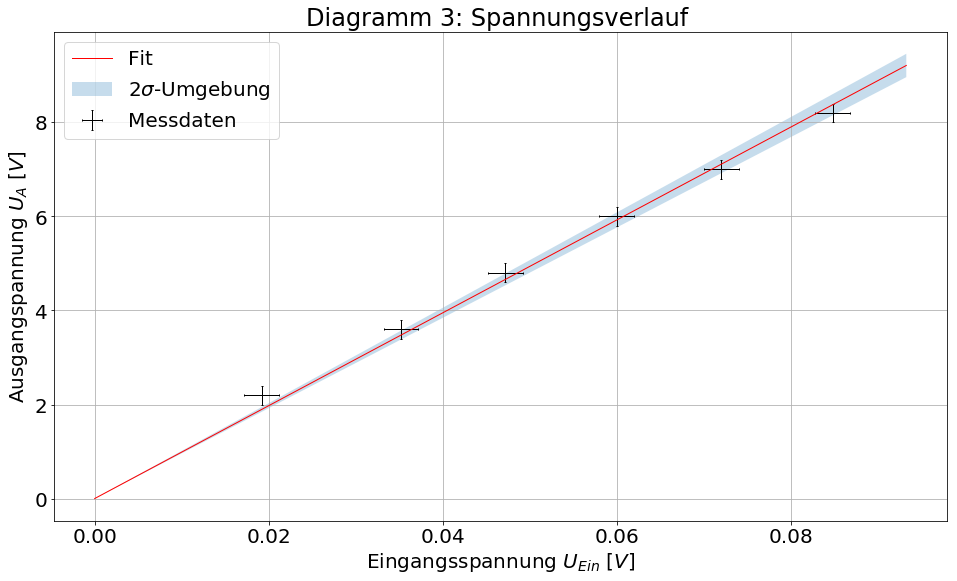

V = 98.7228623576045 , Standardfehler = 1.3295295966210758


Chi-Quadrat = 2.216272977933005
Freiheitsgrade = 5
Chi-Quadrat reduziert = 0.44325459558660096
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 82.0 %


In [3]:
#Messwerte aus Tabelle 3: U_Ein über U_G
U_G = np.array([848, 720, 600, 472, 352, 192])*1e-3
fehler_U_G = np.array([20, 20, 20, 20, 20, 20])*1e-3

U_Ein = U_G/10
fehler_U_Ein = fehler_U_G/10

U_A = np.array([8.2, 7.0, 6.0, 4.8, 3.6, 2.2])
fehler_U_A = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (v) = p
    return v*x

model = odr.Model(fit_func)

#darzustellende Daten
x = U_Ein
y = U_A
delta_x = fehler_U_Ein
delta_y = fehler_U_A

#Startparameter
para0 = [1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 2 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(0, max(x)*1.1)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1,figsize=(16,9))
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, 
             lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 3: Spannungsverlauf ')
plt.grid(True)
plt.xlabel('Eingangsspannung '+r'${U_{Ein}}$'+' '+r'${[V]}$')
plt.ylabel('Ausgangspannung '+r'${U_{A}}$' + ' '+r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, 
                alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')
plt.show()
#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/
                   (delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100
                
print('V =', popt[0], ', Standardfehler =', perr[0])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

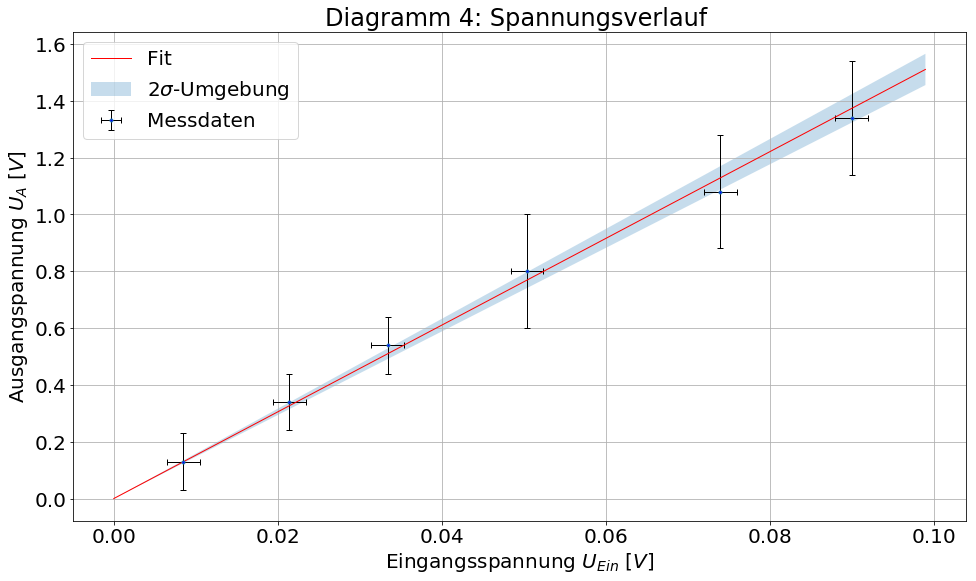

V = 15.252127107707407 , Standardfehler = 0.27779907719876284


Chi-Quadrat = 0.2103979620093376
Freiheitsgrade = 5
Chi-Quadrat reduziert = 0.042079592401867524
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 100.0 %


In [4]:
#Messwerte aus Tabelle 4: U_Ein über U_G
U_G = np.array([900, 740, 504, 334, 214, 84.8])*1e-3
fehler_U_G = np.array([20, 20, 20, 20, 20, 20])*1e-3

U_Ein = U_G/10
fehler_U_Ein = fehler_U_G/10

U_A = np.array([1.34, 1.08, 0.80, 0.54, 0.34, 0.13])
fehler_U_A = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.1])

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (v) = p
    return v*x

model = odr.Model(fit_func)

#darzustellende Daten
x = U_Ein
y = U_A
delta_x = fehler_U_Ein
delta_y = fehler_U_A

#Startparameter
para0 = [1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 2 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(0, max(x)*1.1)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1,figsize=(16,9))
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', 
             fmt='.',mfc='b', capsize=3, label='Messdaten')
plt.title('Diagramm 4: Spannungsverlauf ')
plt.grid(True)
plt.xlabel('Eingangsspannung '+r'${U_{Ein}}$'+' '+r'${[V]}$')
plt.ylabel('Ausgangspannung '+r'${U_{A}}$' + ' '+r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')
plt.show()

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/
                   (delta_y**2+((fit_func(popt, x+delta_x)-
                                 fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

print('V =', popt[0], ', Standardfehler =', perr[0])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

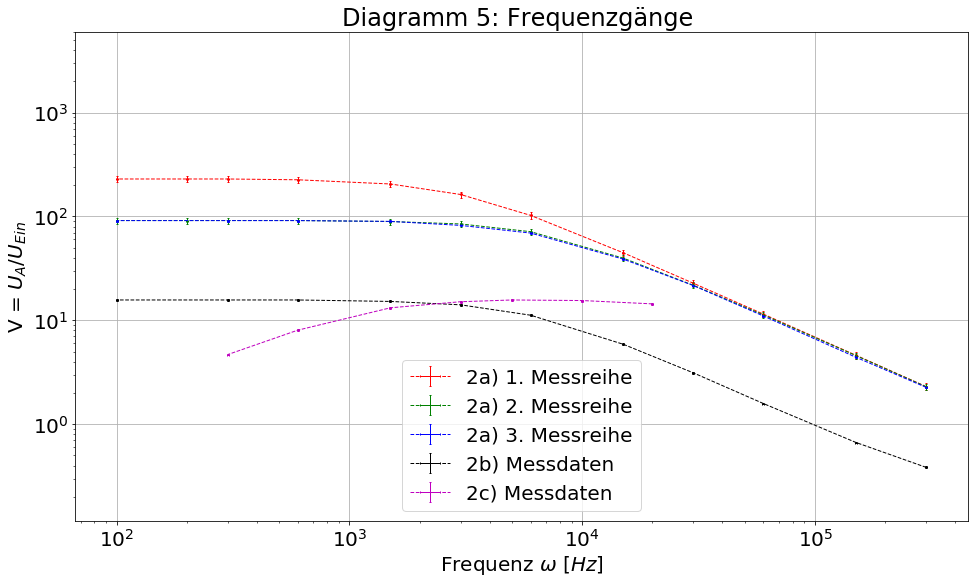

2a) 1. Messreihe: 12 Messwerte
2a) 2. Messreihe: 12 Messwerte
2a) 3. Messreihe: 11 Messwerte
2b) Messdaten: 11 Messwerte
2c) Messdaten: 7 Messwerte


In [5]:
#Messwerte aus Tabelle 5: U_Ein über f

f_1 = np.array([300, 150, 60, 30, 15, 6, 3, 1.5, 0.6, 0.3, 0.2, 0.1])*1e3
fehler_f_1 = f_1*1e-2

U_G_1 = 0.30
fehler_U_G_1 = 0.02

U_Ein_1 = U_G_1/10
fehler_U_Ein_1 = fehler_U_G_1/10

U_A_1 = np.array([0.069, 0.138, 0.344, 0.682, 1.34, 3.07, 4.88, 6.16, 6.76, 6.88, 6.88, 6.88])
fehler_U_A_1 = np.array([0.002, 0.002, 0.002, 0.002, 0.01, 0.01, 0.04, 0.01, 0.04, 0.01, 0.01, 0.01])

V_1 = U_A_1/U_Ein_1
fehler_V_1 = np.sqrt((fehler_U_Ein_1/U_Ein_1)**2+(fehler_U_A_1/U_A_1)**2)*V_1

#Messwerte aus Tabelle 6: U_Ein über f

f_2 = np.array([300, 150, 60, 30, 15, 6, 3, 1.5, 0.6, 0.3, 0.2, 0.1])*1e3
fehler_f_2 = f_2*1e-2

U_G_2 = 0.30
fehler_U_G_2 = 0.02

U_Ein_2 = U_G_2/10
fehler_U_Ein_2 = fehler_U_G_2/10

U_A_2 = np.array([0.0688, 0.137, 0.338, 0.652, 1.19, 2.14, 2.54, 2.68, 2.74, 2.74, 2.74, 2.74])
fehler_U_A_2 = np.array([0.0004, 0.001, 0.002, 0.002, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02])

V_2 = U_A_2/U_Ein_2
fehler_V_2 = np.sqrt((fehler_U_Ein_2/U_Ein_2)**2+(fehler_U_A_2/U_A_2)**2)*V_2

#Messwerte aus Tabelle 7: U_Ein über f

f_3 = np.array([300, 150, 60, 30, 15, 6, 3, 1.5, 0.6, 0.3, 0.1])*1e3
fehler_f_3 = f_3*1e-2

U_G_3 = 1.00
fehler_U_G_3 = 0.02

U_Ein_3 = U_G_3/10
fehler_U_Ein_3 = fehler_U_G_3/10

U_A_3 = np.array([0.226, 0.440, 1.10, 2.16, 3.88, 6.92, 8.20, 8.96, 9.12, 9.12, 9.12])
fehler_U_A_3 = np.array([0.0002, 0.0002, 0.0001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

V_3 = U_A_3/U_Ein_3
fehler_V_3 = np.sqrt((fehler_U_Ein_3/U_Ein_3)**2+(fehler_U_A_3/U_A_3)**2)*V_3

#Messwerte aus Tabelle 8: U_Ein über f

f_4 = np.array([300, 150, 60, 30, 15, 6, 3, 1.5, 0.6, 0.3, 0.1])*1e3
fehler_f_4 = f_3*1e-2

U_G_4 = 1.00
fehler_U_G_4 = 0.02

U_Ein_4 = U_G_4/10
fehler_U_Ein_4 = fehler_U_G_4/10

U_A_4 = np.array([0.0384, 0.0666, 0.1580, 0.312, 0.588, 1.12, 1.41, 1.52, 1.57, 1.57, 1.57])
fehler_U_A_4 = np.array([0.0002, 0.0002, 0.0001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

V_4 = U_A_4/U_Ein_4
fehler_V_4 = np.sqrt((fehler_U_Ein_4/U_Ein_4)**2+(fehler_U_A_4/U_A_4)**2)*V_4

#Messwerte aus Tabelle 9: U_Ein über f

f_5 = np.array([20, 10, 5, 3, 1.5, 0.6, 0.3])*1e3
fehler_f_5 = f_5*1e-2

U_G_5 = 1.00
fehler_U_G_5 = 0.02

U_Ein_5 = U_G_5/10
fehler_U_Ein_5 = fehler_U_G_5/10

U_A_5 = np.array([1.44, 1.55, 1.57, 1.51, 1.32, 0.804, 0.468])
fehler_U_A_5 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.001, 0.001])

V_5 = U_A_5/U_Ein_5
fehler_V_5 = np.sqrt((fehler_U_Ein_5/U_Ein_5)**2+(fehler_U_A_5/U_A_5)**2)*V_5


#darzustellende Daten
x_1 = f_1
delta_x_1 = fehler_f_1
y_1 = V_1
delta_y_1 = fehler_V_1

x_2 = f_2
delta_x_2 = fehler_f_2
y_2 = V_2
delta_y_2 = fehler_V_2

x_3 = f_3
delta_x_3 = fehler_f_3
y_3 = V_3
delta_y_3 = fehler_V_3

x_4 = f_4
delta_x_4 = fehler_f_4
y_4 = V_4
delta_y_4 = fehler_V_4

x_5 = f_5
delta_x_5 = fehler_f_5
y_5 = V_5
delta_y_5 = fehler_V_5

#Plot-Umgebung
x_fit = [min([*x_1, *x_2, *x_3, *x_4, *x_5]), max([*x_1, *x_2, *x_3, *x_4, *x_5])]
fit = [min([*y_1, *y_2, *y_3, *y_4, *y_5])/2, max([*y_1, *y_2, *y_3, *y_4, *y_5])*16]

#Plot
plt.figure(5,figsize=(16,9))
plt.errorbar(x_1, y_1, yerr=delta_y_1, xerr=delta_x_1, lw=1, ecolor='r', fmt='--r', 
             capsize=1, label='2a) 1. Messreihe')
plt.errorbar(x_2, y_2, yerr=delta_y_2, xerr=delta_x_2, lw=1, ecolor='g', fmt='--g', 
             capsize=1, label='2a) 2. Messreihe')
plt.errorbar(x_3, y_3, yerr=delta_y_3, xerr=delta_x_3, lw=1, ecolor='b', fmt='--b', 
             capsize=1, label='2a) 3. Messreihe')
plt.errorbar(x_4, y_4, yerr=delta_y_4, xerr=delta_x_3, lw=1, ecolor='k', fmt='--k', 
             capsize=1, label='2b) Messdaten')
plt.errorbar(x_5, y_5, yerr=delta_y_5, xerr=delta_x_5, lw=1, ecolor='m', fmt='--m', 
             capsize=1, label='2c) Messdaten')

plt.title('Diagramm 5: Frequenzgänge ')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, lw=0)
plt.xlabel('Frequenz '+r'${\omega}$'+' '+r'${[Hz]}$')
plt.ylabel('V = '+r'${{U_{A}}/{U_{Ein}}}$')
plt.legend(loc='best')
plt.show()

print('2a) 1. Messreihe:', x_1.size, 'Messwerte')
print('2a) 2. Messreihe:', x_2.size, 'Messwerte')
print('2a) 3. Messreihe:', x_3.size, 'Messwerte')
print('2b) Messdaten:', x_4.size, 'Messwerte')
print('2c) Messdaten:', x_5.size, 'Messwerte')